In [111]:
import torch
from transformers import AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
recording = "rec.mp3"
output_file = "transcription.txt"

In [3]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

model_id = "openai/whisper-large-v3"

model = AutoModelForSpeechSeq2Seq.from_pretrained(
    model_id, torch_dtype=torch_dtype, low_cpu_mem_usage=True, use_safetensors=True
)
model.to(device)

processor = AutoProcessor.from_pretrained(model_id)

pipe = pipeline(
    "automatic-speech-recognition",
    model=model,
    tokenizer=processor.tokenizer,
    feature_extractor=processor.feature_extractor,
    torch_dtype=torch_dtype,
    device=device,
    return_timestamps=True,
    generate_kwargs={"language": "russian"},
)

generation_config.json:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

Device set to use cuda:0


In [88]:
result = pipe(recording)
len(result["chunks"])

/home/frznfrg/.conda/envs/audio/lib/python3.10/site-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


318

In [89]:
with open("transcription.txt", "w") as f:
    for line in result["chunks"]:
        f.write(f"{line['timestamp']}: {line['text']} \n")

In [116]:
seconds = 0
words_per_interval = {seconds: 0}
previous_end = 0
for line in result["chunks"]:
    start, end = line["timestamp"]
    text = line["text"]
    if start < previous_end or end == 0:
        seconds += start
    if text != '':
        words_per_interval[seconds + end] = len(text)
        previous_end = end
    

In [135]:
sns.set_theme(style="darkgrid", palette="dark")

<Axes: title={'center': 'Speed of speach'}, xlabel='seconds', ylabel='words'>

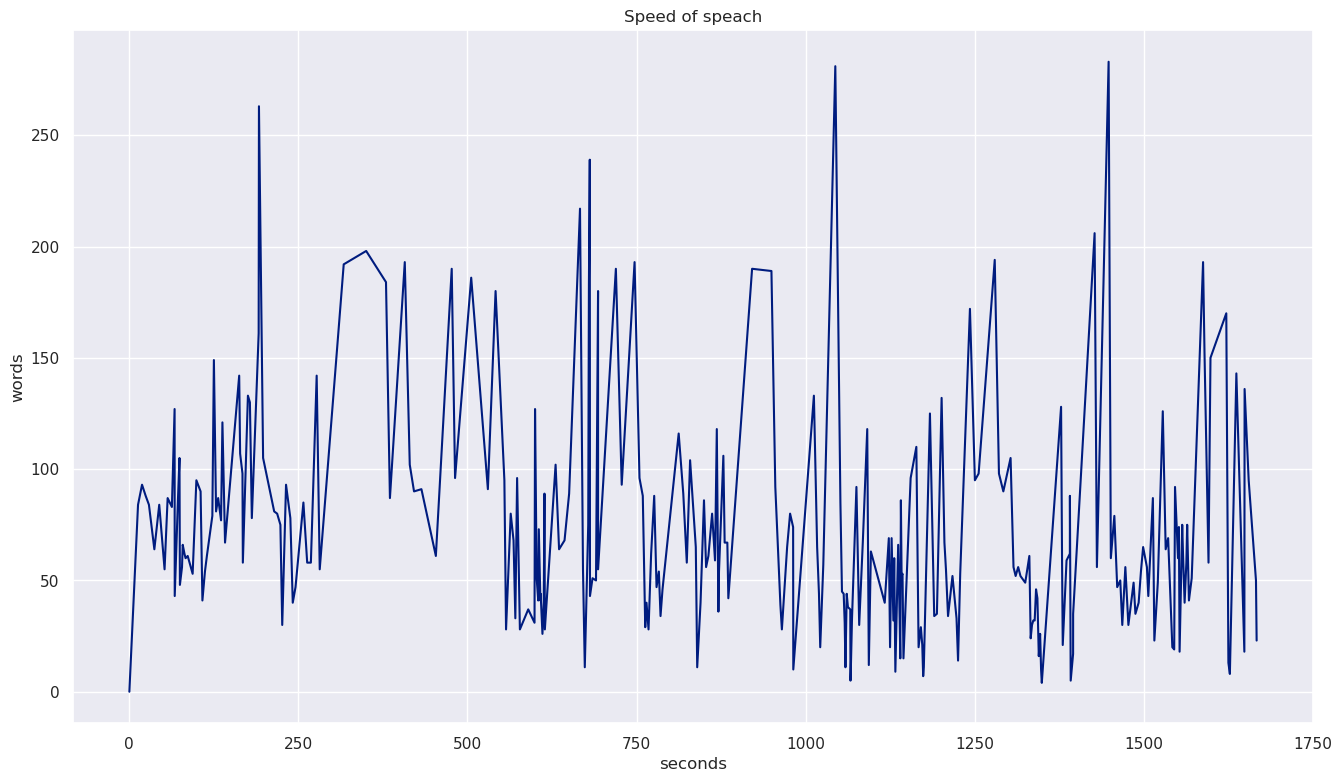

In [136]:
plt.figure(figsize=(16,9))
plt.title("Speed of speach")
plt.xlabel("seconds")
plt.ylabel("words")
sns.lineplot(words_per_interval)